In [1]:
import os, sys

notebook_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.load_data import load_data
from scripts.preprocessing_and_EDA import *
from scripts.modeling_and_evaluation import *

In [3]:
df = '../../Data/BrentOilPrices.csv'
df = load_data(df)
df

c:\Users\pc\Desktop\10_Academy\Week-10\kaim-week-10\scripts\load_data.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(df, parse_dates=['Date'], dayfirst=True)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [4]:
df = preprocessing(df)
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


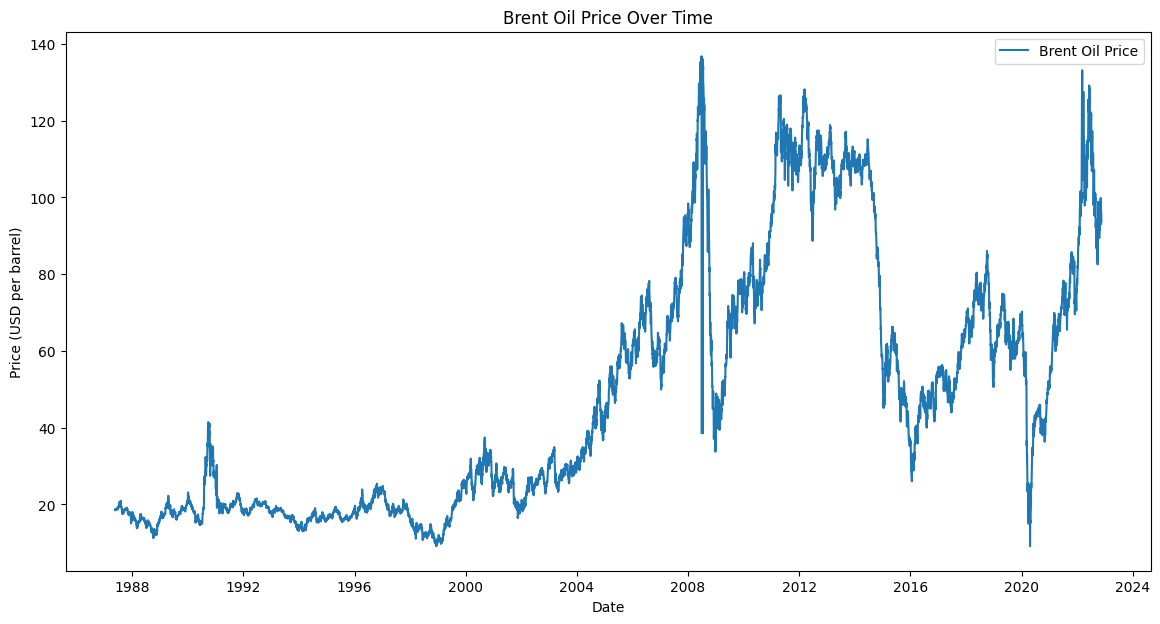

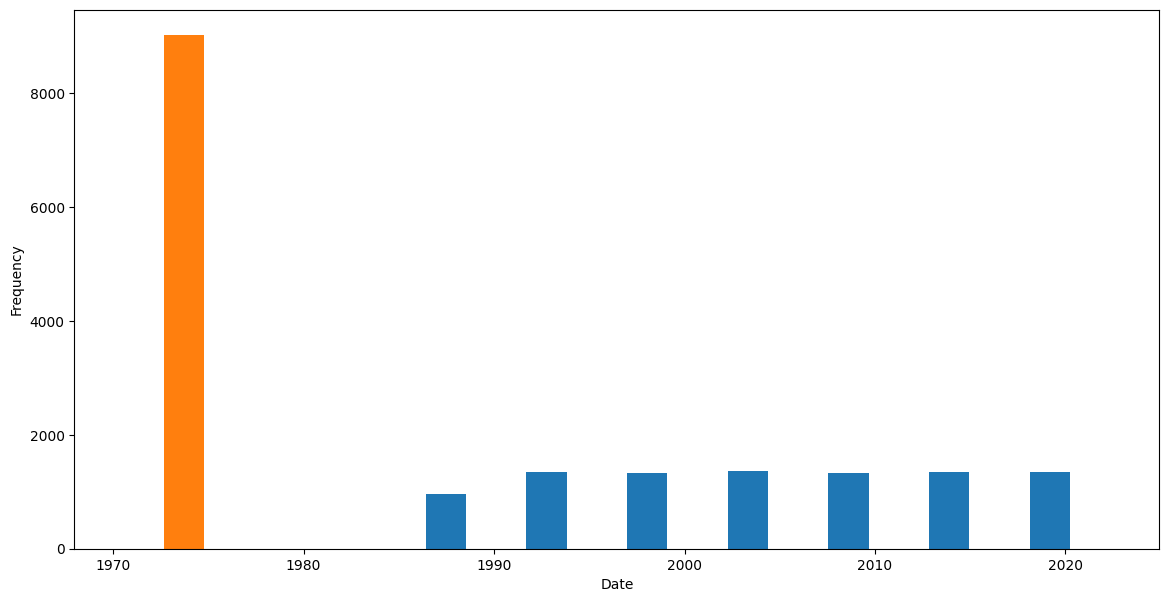

In [5]:
EDA(df)

In [5]:
df['Price_diff'] = df['Price'].diff()
# df['Price_diff'].isnull().sum()
if check_stationarity(df['Price_diff']):
    # 
    arima_model = build_arima_model(df)
    # Econometric Model
    linear_model = build_linear_regression_model(df)
    
    # Machine Learning Model
    rf_model = build_random_forest_model(df)
else:
    print("Time series is not stationary.")

c:\Users\pc\Desktop\10_Academy\Week-10\kaim-week-10\.myvenv10\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pc\Desktop\10_Academy\Week-10\kaim-week-10\.myvenv10\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [6]:
models = define_models(arima_model, linear_model, rf_model)

In [7]:
metrics_df = compare_models(models, df, forecast_steps=30)
print(metrics_df)

                       RMSE       MAE  R-squared
ARIMA              2.518242  2.006086  -0.015670
Linear Regression  1.966641  1.647242   0.380547
Random Forest      1.378392  0.905970   0.695699


In [8]:
# Identify the best-performing model based on RMSE
best_model = metrics_df['RMSE'].idxmin()
print(f"Best performing model: {best_model}")

Best performing model: Random Forest


In [ ]:
# Generate insights for arima_model
insights = generate_insights(arima_model)
print(insights)

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20409.089
Date:                Thu, 20 Feb 2025   AIC                          40824.177
Time:                        18:45:54   BIC                          40845.496
Sample:                             0   HQIC                         40831.431
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6894      0.003    270.555      0.000       0.684       0.694
ma.L1         -0.8338      0.002   -417.030      0.000      -0.838      -0.830
sigma2         5.4326      0.006    895.432      0.0

In [10]:
# Generate insights for linear model
insights = generate_insights(linear_model)
print(insights)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.720e+06
Date:                Thu, 20 Feb 2025   Prob (F-statistic):                        0.00
Time:                        18:47:22   Log-Likelihood:                         -20574.
No. Observations:                9010   AIC:                                  4.115e+04
Df Residuals:                    9008   BIC:                                  4.117e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------